In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib import font_manager
font_path = 'C://Users//amita//AppData//Local//Microsoft//Windows//Fonts/Barlow-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [2]:
data = pd.read_csv('chowdary.csv', index_col=0)

y = data['tumour']
X = data.drop('tumour', axis=1)

## XGBoost

In [3]:
from xgboost import XGBRFClassifier

In [4]:
clf2 = XGBRFClassifier(n_estimators=10000, max_depth=0, tree_method='approx')

In [5]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

new_y = lab_enc.fit_transform(y)
clf2.fit(X, new_y)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', max_bin=256, max_cat_threshold=64,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=0,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=10000, n_jobs=0,
                num_parallel_tree=10000, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0, ...)

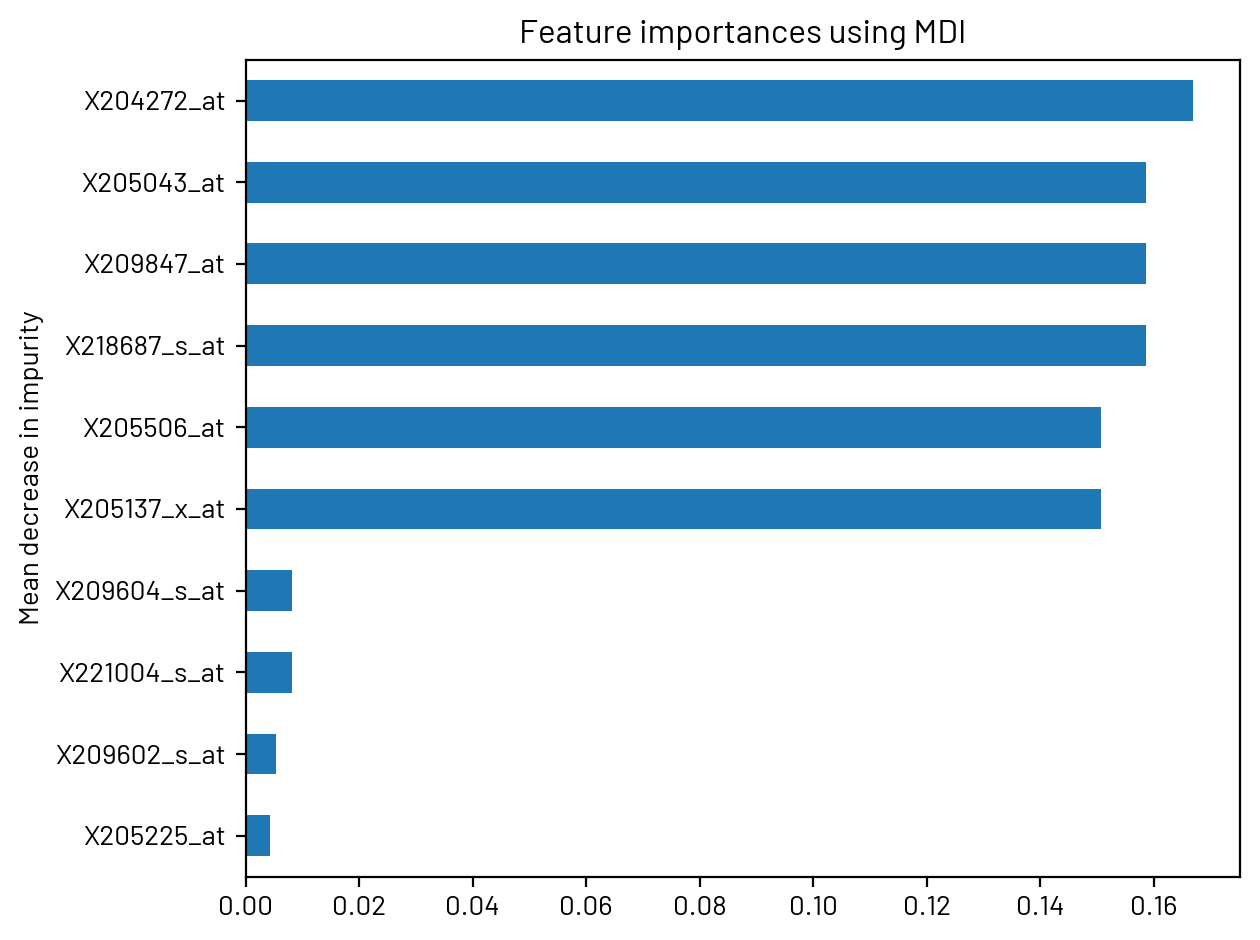

In [6]:
forest_importances = pd.Series(clf2.feature_importances_, index=X.columns)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(dpi=200)
forest_importances_sorted[:10].plot.barh(ax=ax)
plt.gca().invert_yaxis()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()